In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
cols = ['แรงม้า','เงินทุนรวม','คนงานรวม']
dataset = pd.read_csv('hp_no_outlier.csv',encoding='utf-8',usecols=cols)
dataset

,เงินทุนรวม,คนงานรวม,แรงม้า
0,20000000.0,5.0,270.68
1,43100000.0,10.0,356.00
2,8035000.0,1.0,83.05
3,5500000.0,13.0,191.00
4,6000000.0,25.0,167.25
...,...,...,...
1509,3600000.0,6.0,178.00
1510,8000000.0,18.0,83.00
1511,15700000.0,8.0,301.29
1512,45000000.0,15.0,278.50


In [42]:
dataset.describe()

,เงินทุนรวม,คนงานรวม,แรงม้า
count,1.514000e+03,1514.000000,1514.000000
mean,1.121034e+07,11.321424,221.513156
std,9.757730e+06,5.798987,156.663836
min,1.500000e+05,1.000000,15.200000
25%,4.000000e+06,7.000000,95.000000
50%,8.000000e+06,10.000000,171.750000
75%,1.500000e+07,15.000000,296.850000
max,4.540750e+07,29.000000,686.500000


In [43]:
dataset.mode()

,เงินทุนรวม,คนงานรวม,แรงม้า
0,10000000.0,10.0,90.0


In [44]:
Q1_worker = dataset['คนงานรวม'].quantile(0.25)
Q3_worker = dataset['คนงานรวม'].quantile(0.75)
Q1_worker,Q3_worker

(7.0, 15.0)

In [45]:
IQR_worker = Q3_worker - Q1_worker
IQR_worker

8.0

In [46]:
lower_outlier_worker = Q1_worker - 1.5*IQR_worker
upper_outlier_worker = Q3_worker + 1.5*IQR_worker
lower_outlier_worker, upper_outlier_worker

(-5.0, 27.0)

In [47]:
dataset[(dataset['คนงานรวม'] < lower_outlier_worker)|(dataset['คนงานรวม'] > upper_outlier_worker)]

,เงินทุนรวม,คนงานรวม,แรงม้า
102,19000000.0,29.0,218.75
272,11500000.0,28.0,211.00
353,11500000.0,28.0,370.00
401,8000000.0,28.0,285.00
566,7496000.0,28.0,79.00
609,20584000.0,28.0,293.00
878,1250000.0,28.0,70.00
1187,13180000.0,28.0,615.85
1387,11000000.0,29.0,77.50


In [48]:
worker_no_outlier = dataset[(dataset['คนงานรวม'] > lower_outlier_worker) & (dataset['คนงานรวม'] < upper_outlier_worker)]
worker_no_outlier

,เงินทุนรวม,คนงานรวม,แรงม้า
0,20000000.0,5.0,270.68
1,43100000.0,10.0,356.00
2,8035000.0,1.0,83.05
3,5500000.0,13.0,191.00
4,6000000.0,25.0,167.25
...,...,...,...
1509,3600000.0,6.0,178.00
1510,8000000.0,18.0,83.00
1511,15700000.0,8.0,301.29
1512,45000000.0,15.0,278.50


In [49]:
# worker_no_outlier.to_csv(r'./worker_no_outlier.csv')

In [50]:
worker_no_outlier.describe()

,เงินทุนรวม,คนงานรวม,แรงม้า
count,1.496000e+03,1496.000000,1496.000000
mean,1.116200e+07,11.125425,221.223381
std,9.745140e+06,5.549258,156.472015
min,1.500000e+05,1.000000,15.200000
25%,4.000000e+06,7.000000,95.000000
50%,8.000000e+06,10.000000,171.250000
75%,1.500000e+07,15.000000,296.550000
max,4.500000e+07,26.000000,686.500000


In [51]:
worker_no_outlier.mode()

,เงินทุนรวม,คนงานรวม,แรงม้า
0,10000000.0,10.0,90.0


C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='คนงานรวม'>

C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3609 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 3619 missing f

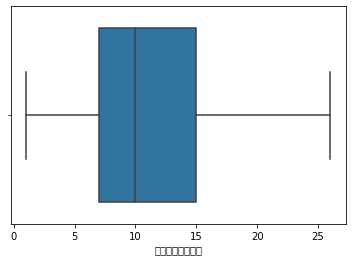

In [52]:
sns.boxplot(worker_no_outlier['คนงานรวม'])